In [31]:
import pandas as pd
import editdistance
import matplotlib.pyplot as plt
import numpy as np

In [11]:
df_4 = pd.read_csv('4_letters.txt', sep="\s+", header=None, names=['word', 'phon', 'freq'])
df_8 = pd.read_csv('8_letters.txt', sep="\s+", header=None, names=['word', 'phon', 'freq'])

In [12]:
df_4_w = df_4['word'].values.tolist()
df_8_w = df_8['word'].values.tolist()

In [13]:
# generate all combinations of words from df_4_w and df_8_w and compute edit distance
# for each pair


def edit_distance(word1, word2):
    return editdistance.eval(word1, word2)

# generate all pairs from df_4_w and df_8_w
pairs = []
for w1 in df_4_w:
    for w2 in df_8_w:
        pairs.append((w1, w2))

# compute edit distance for each pair
edit_distances = []
for pair in pairs:
    edit_distances.append(edit_distance(pair[0], pair[1]))

# create a dictionary of pairs and edit distances
pairs_edit_distances = dict(zip(pairs, edit_distances))

In [14]:
# top 20 pairs with the highest edit distance such that pairs[1] and pairs[2] do not repeat
sorted_pairs_edit_distances = sorted(pairs_edit_distances.items(), key=lambda x: x[1], reverse=True)
top_20 = []

for pair in sorted_pairs_edit_distances:
    # while len(top_20) < 20:
    if pair[0][0] not in top_20 and pair[0][1] not in top_20:
        top_20.append(pair[0][0])
        top_20.append(pair[0][1])

top_20 = top_20[:20]

In [17]:
# print top_20 as a list of pairs (i.e. 4-letter word, 8-letter word)
pairs = []
for i in range(0, len(top_20), 2):
    pairs.append((top_20[i], top_20[i+1]))

print(pairs)

[('cauv', 'ghrertch'), ('urbe', 'chawntch'), ('fusk', 'wroarnte'), ('tarb', 'shoughse'), ('demb', 'thwisque'), ('gyte', 'strourgn'), ('kilv', 'sprource'), ('yirv', 'ghleente'), ('weff', 'phroughm'), ('ciff', 'ghleuche')]


In [25]:
# create a dataframe of edit distances
df = pd.DataFrame(index=[_[0] for _ in pairs], columns=[_[1] for _ in pairs])

# fill in the dataframe with edit distances using column and row names from df
for i in range(len(pairs)):
    for j in range(len(pairs)):
        df.iloc[i, j] = pairs_edit_distances[(pairs[i][0], pairs[j][1])]

In [26]:
df

,ghrertch,chawntch,wroarnte,shoughse,thwisque,strourgn,sprource,ghleente,phroughm,ghleuche
cauv,8,6,7,7,7,7,7,8,7,7
urbe,7,8,6,6,7,6,5,7,7,6
fusk,8,8,8,6,7,7,7,8,7,7
tarb,7,7,6,8,7,6,7,8,7,8
demb,7,8,8,8,8,8,8,7,8,7
gyte,6,7,6,6,7,8,7,5,8,6
kilv,8,8,8,8,7,8,8,7,8,7
yirv,7,8,7,8,7,7,7,8,7,8
weff,7,7,7,8,7,8,8,7,8,7
ciff,8,7,8,8,7,8,8,8,8,8


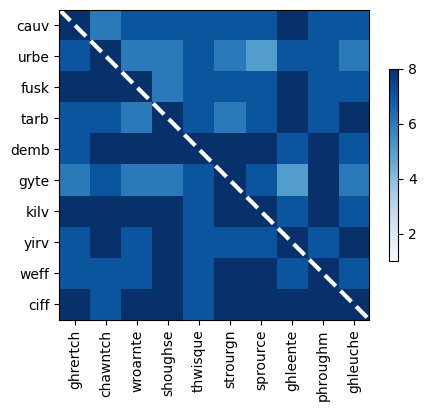

In [72]:
plt.figure(figsize=(5, 5))
plt.imshow(df.astype('float'), cmap='Blues')
plt.clim(1, 8)  # Update the color limit

# Set colorbar ticks within the specified range
plt.colorbar(ticks=[2, 4, 6, 8], shrink=0.5)

plt.xticks(np.arange(len(df.columns)), df.columns, rotation=90)
plt.yticks(np.arange(len(df.index)), df.index)

# Add white dotted diagonal line crossing the heatmap
plt.plot([-0.5, len(df.columns) - 0.5], [-0.5, len(df.index) - 0.5], 'w--', linewidth=3)
plt.savefig('stimuli_word_heatmap.pdf', bbox_inches='tight')
plt.show()

In [76]:
# print pairs list as a latex table
print('\\begin{tabular}{|c|c|}')
print('\\hline')
print('4-letter word & 8-letter word \\\\')
print('\\hline')
for pair in pairs:
    print(pair[0], '&', pair[1], '\\\\')
    print('\\hline')
print('\\end{tabular}')

\begin{tabular}{|c|c|}
\hline
4-letter word & 8-letter word \\
\hline
cauv & ghrertch \\
\hline
urbe & chawntch \\
\hline
fusk & wroarnte \\
\hline
tarb & shoughse \\
\hline
demb & thwisque \\
\hline
gyte & strourgn \\
\hline
kilv & sprource \\
\hline
yirv & ghleente \\
\hline
weff & phroughm \\
\hline
ciff & ghleuche \\
\hline
\end{tabular}


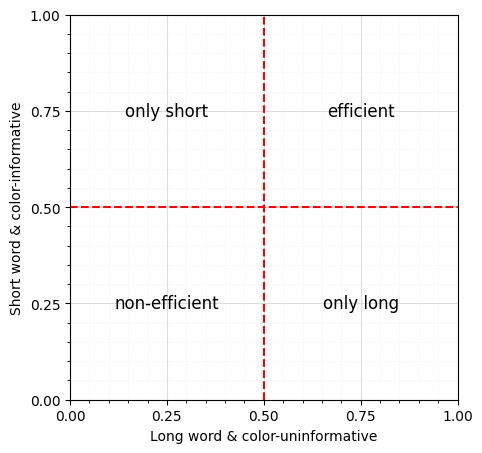

In [90]:
plt.figure(figsize=(5, 5)) 
plt.xlim(0, 1)
plt.ylim(0, 1)
## add red vertical and horizontal lines at 0.5
plt.axvline(x=0.5, color='red', linestyle='--')
plt.axhline(y=0.5, color='red', linestyle='--')
plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# make breaks at 0, 0.25, 0.5, 0.75, 1
plt.xticks(np.arange(0, 1.1, 0.25))
plt.yticks(np.arange(0, 1.1, 0.25))
plt.minorticks_on()
plt.ylabel('Short word & color-informative')
plt.xlabel('Long word & color-uninformative')

# place words non-efficient, efficient, only short, only long on the corresponding quadrants
plt.text(0.25, 0.75, 'only short', fontsize=12, ha='center', va='center')
plt.text(0.75, 0.75, 'efficient', fontsize=12, ha='center', va='center')
plt.text(0.25, 0.25, 'non-efficient', fontsize=12, ha='center', va='center')
plt.text(0.75, 0.25, 'only long', fontsize=12, ha='center', va='center')

plt.savefig('strategy_plot.pdf', bbox_inches='tight')